# Main Histogram Running Tests Platform for the Exhaust Fan analisys
## Test 4

In [1]:
import sys

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

import time
import numpy as np
from data_science.analysis_methodology import HistogramConsistencyTest
from data_science import CompareData
from data_science.preprocessing_data.Metrics_calculation import *
import matplotlib.pyplot as plt
from Histogram_results_plotfunction import plot, recorded_ratio

Using TensorFlow backend.


Time Insertion

In [2]:
t0 = time.time()

Load data test
Call the histogram program and plot analisys

Nominal rotation of 1720 rpm

Filter type used is Wavelets, can be changed to frequency harmonic filters  or None

P-value Limit threshold defined to 0.01 = 1% p-value due to acquired noises, can be changed  0.01 to 100%

Number of Bias of the Histogram defined in 20, can be changed 1 to inf.

Rotation speed rotation estimation defined to zero (none), can be changed by any number in rpm 

In [3]:
# # load data
num_test = 4

data =np.load("Teste_"+str(num_test)+"_300.npy")


#The acelerometer factor calibration
# 1 a 4 = [43.845   32.668   10.153   25.729] m/(V*s^2)

data[:,1]=43.845*data[:,1]
data[:,2]=32.668*data[:,2]
data[:,3]=10.153*data[:,3]
data[:,4]=25.729*data[:,4]


dt = 0.000061036

# call and plot analisys

step = 1
hct = HistogramConsistencyTest(
  nominal_rotation=29, filter_type= "wavelets", p_value_limit=0.01, n_bias=20,
  rotational_speed_estimation=0
  
)

Reading 4 sensors that is the four initial coloumns 

Slice_Size = 7856 dots (Resolution can be changed) 

In [4]:

 test4 = CompareData(data[::step,1:4], dt*step, hct, slice_size=int(7856/step))


Number of samples: 625
0 of 625 samples analyzed...
100 of 625 samples analyzed...
200 of 625 samples analyzed...
300 of 625 samples analyzed...
400 of 625 samples analyzed...
500 of 625 samples analyzed...
600 of 625 samples analyzed...
625 of 625 samples analyzed!


Plot signal from  Test 4

According to graphic:

Fist box = Raw signal in blue

Second box = Variations in green, where can find anomalous signal (targets) 

Third box = Recorded or not datas in red (divided into packages of 7856 dots each)

Fourth box = P-value from each package results in yellow, Trheshold in purple (adpoted p-value limit)  

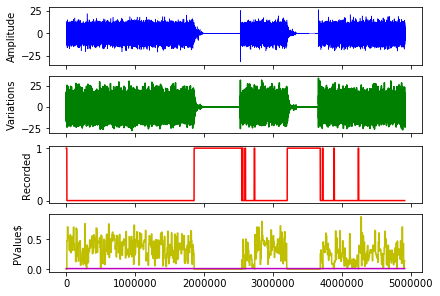

Time spent = 10.680304765701294


In [5]:
plot(test4, n_sensors_plot=1, target=data[::step, 4])

print("Time spent = " + str(time.time() - t0))


F1Score Metrics from Test 04:

In [6]:
print(test4.get_evaluation_metrics(target=data[::step,[4]]))

{'tn': 0, 'fp': 0, 'fn': 469, 'tp': 156, 'accuracy_score': 0.2496, 'recall_score': 0.2496, 'precision_score': 1.0, 'f1_score': 0.3994878361075544}


Recorded Ratio (%) from Test 02:

In [7]:
print("Dados salvos = ", recorded_ratio(test4))
a = np.array(test4.record)   

Dados salvos =  24.96
